In [1]:
#Importing packages
import iris
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import datetime
import numpy as np
import iris.coords as icoords
import iris.coord_categorisation
import iris.quickplot as qplt 
from matplotlib.lines import Line2D

In [2]:
#reading in carbon and oxygen isotope data
df_c = pd.read_csv("YOK-I_d13C_v2.csv")
df_o = pd.read_csv("YOK-I_d18O_v2.csv")

In [3]:
#extracting year and isotope values to dataframes
Year = df_c["Age"]
Carbon = df_c["Carbon"]

Year_o = df_o["Age"]
Oxygen = df_o["Oxygen"]

In [4]:
#### OXYGEN ####

# Calculating Standard deviation and mean for oxygen isotopes
Oxygen_SD = np.std(Oxygen)
Oxygen_Mean = np.mean(Oxygen)

# Calcaulting 1SD away from mean upper and lower bounds
O_upper = Oxygen_Mean + Oxygen_SD
O_lower = Oxygen_Mean - Oxygen_SD

O_upper_band = []
O_lower_band = []

for i in range (0,250):
    i = O_upper
    O_upper_band.append(i)
    
for n in range (0,250):
    n = O_lower
    O_lower_band.append(n)
    

In [5]:
#### CARBON ####

# Calculating Standard deviation and mean for carbon isotopes
Carbon_SD = np.std(Carbon)
Carbon_Mean = np.mean(Carbon)

# Calcaulting 1SD away from mean upper and lower bounds
C_upper = Carbon_Mean + Carbon_SD
C_lower = Carbon_Mean - Carbon_SD

C_upper_band = []
C_lower_band = []

for m in range (0,250):
    m = C_upper
    C_upper_band.append(m)
    
for p in range (0,250):
    p = C_lower
    C_lower_band.append(p)

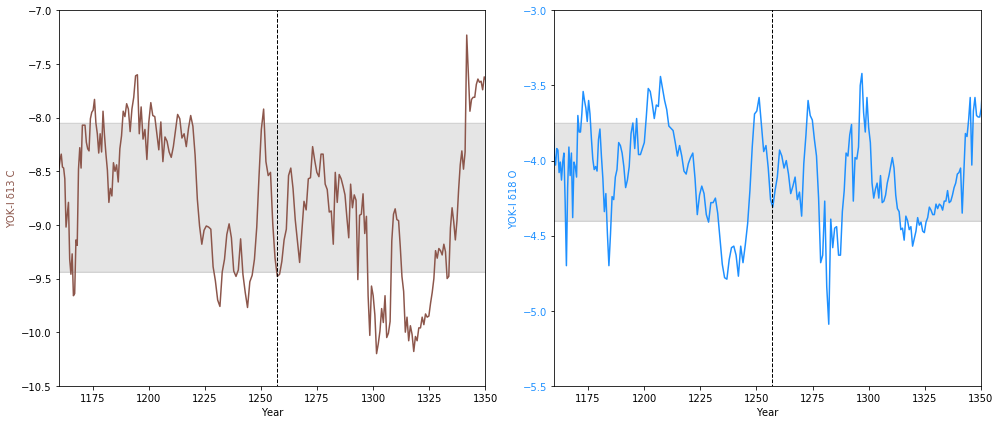

In [6]:
### Plotting C and O isotopes for 80 year period
## Envelope of internal variability defined as 1 SD from mean (calculated above from 200 year period)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
color = 'tab:brown'
plt.xlabel('Year')
plt.ylabel('YOK-I ' + u'\u03B4' + '13 C', color=color)
plt.plot(Year, Carbon, color=color)
plt.plot(Year, C_upper_band, color='grey', alpha = 0.1)
plt.plot(Year, C_lower_band, color='grey', alpha = 0.1)
plt.fill_between(Year, C_upper_band,C_lower_band, color='grey', alpha = 0.2)
plt.plot([1257,1257],[-20,-5], c='black', lw=1, linestyle='--')
plt.xlim(1160,1350)
plt.ylim(-10.5,-7)

plt.subplot(1,2,2)
color = 'dodgerblue'
plt.ylabel('YOK-I ' + u'\u03B4' + '18 O', color=color)  # we already handled the x-label with ax1
plt.xlabel('Year')
plt.plot(Year, Oxygen, color=color)
plt.tick_params(axis='y', labelcolor=color)
plt.plot(Year, O_upper_band, color='grey', alpha = 0.1)
plt.plot(Year, O_lower_band, color='grey', alpha = 0.1)
plt.plot([1257,1257],[-20,-1], c='black', lw=1, linestyle='--')
plt.fill_between(Year, O_upper_band, O_lower_band, color='grey', alpha = 0.2)

plt.xlim(1160,1350)
plt.ylim(-5.5,-3)

plt.tight_layout()

plt.savefig('YOK-I_with_envelope.pdf')

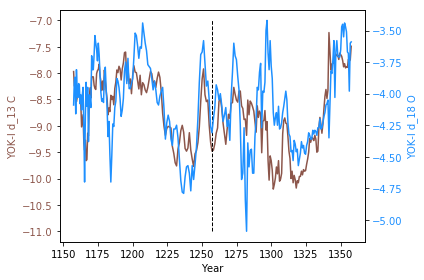

In [7]:
### Plotting C and O isotopes for 200 year period

fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('Year')
ax1.set_ylabel('YOK-I d_13 C', color=color)
ax1.plot(Year, Carbon, color=color)
ax1.plot([1257,1257],[-11,-7], c='black', lw=1, linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # a second axes that shares the same x-axis

color = 'dodgerblue'
ax2.set_ylabel('YOK-I d_18 O', color=color)  
ax2.plot(Year, Oxygen, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.tight_layout()

plt.savefig('YOK-I_200.pdf')


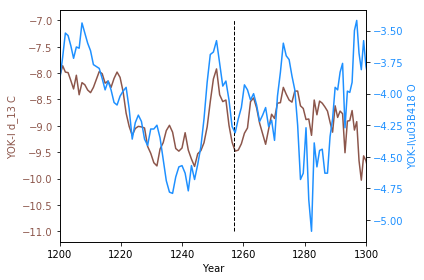

In [8]:
### Plotting C and O isotopes for 100 year period

fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('Year')
ax1.set_ylabel('YOK-I d_13 C', color=color)
ax1.plot(Year, Carbon, color=color)
ax1.plot([1257,1257],[-11,-7], c='black', lw=1, linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'dodgerblue'
ax2.set_ylabel('YOK-I' + '\u03B4' + '18 O', color=color)  # we already handled the x-label with ax1
ax2.plot(Year, Oxygen, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xlim(1200,1300)

plt.tight_layout()

plt.savefig('YOK-I_100.pdf')